# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Linux/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.10000000149011612
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -7.98782539 -1.5
 -0.          0.         -7.11741829  5.94114017 -0.          0.        ]


In [8]:
import torch
import numpy as np
from maddpg_agent import Agent
import os
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def maddpg_train(n_episodes=5000, print_every=50):
    """ Training MADDPG agents
    Params
    ======
        n_episodes (int)      : maximum number of training episodes
        print_every: printing results 
    """
    
    best_score = -np.inf
    scores_window = deque(maxlen=100)
    scores_all = []
    moving_avgs = []
    best_epi = 0

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]        
        states = np.reshape(env_info.vector_observations, (1, -1)) 
        agent0.reset()
        agent1.reset()
        scores = np.zeros(num_agents)
        while True:
            A0 = agent0.act(states, add_noise=True)                
            A1 = agent1.act(states, add_noise=True)                 
            actions = np.concatenate((A0, A1), axis=0).flatten()    
            
            env_info = env.step(actions)[brain_name]           
            next_states = np.reshape(env_info.vector_observations, (1, -1))  
            rewards = env_info.rewards                       
            dones = env_info.local_done                        
            agent0.step(states, actions, rewards[0], next_states, dones[0])  
            agent1.step(states, actions, rewards[1], next_states, dones[1])
            scores += np.max(rewards)                          
            states = next_states                               
            if np.any(dones):                                   
                break

        epi_best_score = np.max(scores)
        scores_all.append(epi_best_score)
        scores_window.append(epi_best_score)
        moving_avgs.append(np.mean(scores_window))

        # print results
        if i_episode % print_every == 0:
            print('Episodes {:0>4d}-{:0>4d}\tMax Reward: {:.4f}\tMoving Average: {:.4f}'.format(
                i_episode-print_every, i_episode, np.max(scores_all[-print_every:]), moving_avgs[-1]))
            
        if epi_best_score > best_score:
            best_score = epi_best_score
            best_epi = i_episode
        
        if i_episode >= 100 and moving_avgs[-1]>= 0.5:
            print('\n Solved in Episode {:0>4d}\t Score: {:.4f}\tMoving Avgs Score: {:.4f}'\
                  .format(i_episode, epi_best_score, moving_avgs[-1]))
            torch.save(agent0.actor_local.state_dict(),'checkpoint_agent0_actor.pt')
            torch.save(agent0.critic_local.state_dict(),'checkpoint_agent0_critic.pt')
            torch.save(agent1.actor_local.state_dict(),'checkpoint_agent1_actor.pt')
            torch.save(agent1.critic_local.state_dict(),'checkpoint_agent1_critic.pt')
            
            break
            
    np.save('final_scores.npy', scores_all)
    
    return scores_all, moving_avgs

In [10]:
agent0 = Agent(state_size, action_size, agent_id=0, seed=0)
agent1 = Agent(state_size, action_size, agent_id=1, seed=0)
scores, moving_average = maddpg_train()

Episodes 0000-0050	Max Reward: 0.1000	Moving Average: 0.0040
Episodes 0050-0100	Max Reward: 0.0000	Moving Average: 0.0020
Episodes 0100-0150	Max Reward: 0.1000	Moving Average: 0.0020
Episodes 0150-0200	Max Reward: 0.2000	Moving Average: 0.0140
Episodes 0200-0250	Max Reward: 0.1000	Moving Average: 0.0200
Episodes 0250-0300	Max Reward: 0.1000	Moving Average: 0.0300
Episodes 0300-0350	Max Reward: 0.2000	Moving Average: 0.0400
Episodes 0350-0400	Max Reward: 0.3000	Moving Average: 0.0430
Episodes 0400-0450	Max Reward: 0.2000	Moving Average: 0.0600
Episodes 0450-0500	Max Reward: 0.3000	Moving Average: 0.0810
Episodes 0500-0550	Max Reward: 0.2000	Moving Average: 0.0969
Episodes 0550-0600	Max Reward: 0.3000	Moving Average: 0.1058
Episodes 0600-0650	Max Reward: 0.4000	Moving Average: 0.1129
Episodes 0650-0700	Max Reward: 0.4000	Moving Average: 0.1030
Episodes 0700-0750	Max Reward: 0.3000	Moving Average: 0.0840
Episodes 0750-0800	Max Reward: 0.3000	Moving Average: 0.0760
Episodes 0800-0850	Max R

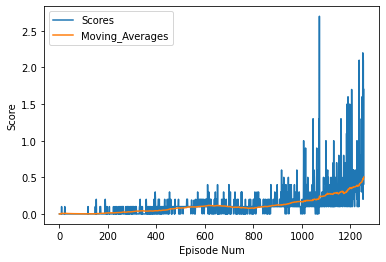

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='Scores')
plt.plot(np.arange(len(scores)), moving_average, label='Moving_Averages')
plt.legend(loc='upper left');
plt.ylabel('Score')
plt.xlabel('Episode Num')
plt.show()

In [12]:
env.close()